In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [3]:
df = pd.read_csv('tg_users_groups_actions_202412082008.csv')
df

,id,chat_id,action,action_from,action_to,reply_on_id,reply_on_chat_id,message_id,message_chat_id,time,created_at
0,61921,-1001255686586,message,490909755,NaN,NaN,NaN,1078,-1001255686586,2020-09-05 15:55:14.000 +0300,2024-12-02 23:54:43.617
1,61917,-1001255686586,message,447463387,NaN,NaN,NaN,1083,-1001255686586,2020-09-05 19:05:16.000 +0300,2024-12-02 23:54:43.186
2,61918,-1001255686586,message,447463387,NaN,NaN,NaN,1082,-1001255686586,2020-09-05 19:05:16.000 +0300,2024-12-02 23:54:43.395
3,61916,-1001255686586,message,520649308,NaN,NaN,NaN,1084,-1001255686586,2020-09-05 19:08:15.000 +0300,2024-12-02 23:54:43.005
4,61915,-1001255686586,message,369448325,NaN,NaN,NaN,1085,-1001255686586,2020-09-05 20:10:56.000 +0300,2024-12-02 23:54:42.861
...,...,...,...,...,...,...,...,...,...,...,...
118760,143750,-1001422302072,message,281655591,NaN,NaN,NaN,151807,-1001422302072,2024-12-08 16:20:43.000 +0300,2024-12-08 13:24:58.372
118761,143749,-1001422302072,message,1068019187,NaN,NaN,NaN,151809,-1001422302072,2024-12-08 16:23:35.000 +0300,2024-12-08 13:24:57.344
118762,143748,-1001422302072,message,281655591,NaN,NaN,NaN,151810,-1001422302072,2024-12-08 16:23:35.000 +0300,2024-12-08 13:24:56.420
118763,143747,-1001422302072,message,1068019187,NaN,NaN,NaN,151811,-1001422302072,2024-12-08 16:24:22.000 +0300,2024-12-08 13:24:55.528


In [4]:
df_users = pd.read_csv('tg_users_last_202412081804.csv')
df_users

,tg_id,user_name,first_name,last_name,last_online,created_at
0,949454025,@Rollersman,Ivan,Vinogradov,2023-10-25 15:30:00.000 +0300,2024-12-02 19:03:17.308
1,437243863,@dmkhvatov,Дмитрий Хватов,NaN,2023-10-25 15:30:00.000 +0300,2024-12-02 19:03:17.420
2,277202123,@JustCookies,Лобанов,NaN,2023-10-25 15:30:00.000 +0300,2024-12-02 19:03:17.468
3,11,@new_user5,Иван,Иванов,2023-10-25 15:30:00.000 +0300,2024-11-25 15:14:19.144
4,7410432285,@avgust_buddy,Август,NaN,2024-11-25 18:19:28.000 +0300,2024-11-25 15:20:06.759
...,...,...,...,...,...,...
10164,6407616608,vvv843,Vvv,NaN,2023-10-25 15:30:00.000 +0300,2024-12-08 13:31:09.192
10165,907794408,rokuud,Влада,NaN,2023-10-25 15:30:00.000 +0300,2024-12-08 13:31:12.994
10166,567065522,YudinaJenya,Евгения,Юдина 🤍,2023-10-25 15:30:00.000 +0300,2024-12-08 13:31:14.280
10167,471923927,drsv212121,Svetochkа🖤,NaN,2023-10-25 15:30:00.000 +0300,2024-12-08 13:31:23.939


In [5]:
df_groups = pd.read_csv('tg_groups_stats_last_202412081805.csv')
df_groups

,chat_id,chat_name,users_count,created_at
0,1,hggg,4,2024-11-25 15:14:19.096
1,-1002313549011,this_chat_love,3,2024-11-25 15:33:44.999
2,-1002023700211,Lolilendss,7191,2024-11-25 15:46:59.823
3,-1002462279841,new_love_chat,4,2024-11-25 18:59:10.860
4,-1001122783212,fpmi_abitu,2712,2024-11-25 19:09:35.721
...,...,...,...,...
67,-1001195309745,druzyabd,45358,2024-12-03 13:52:12.475
68,-1001549352738,chat_devushkim,32125,2024-12-03 16:21:11.439
69,-1001592476217,virtiklove,38377,2024-12-03 16:25:59.754
70,-1001679429088,vpiska_chatik,36904,2024-12-03 17:32:21.041


/var/folders/mt/wwjblmbj5hgchst8gt4q51zr0000gn/T/ipykernel_3774/805884978.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_activity['time'] = pd.to_datetime(user_activity['time'])
/var/folders/mt/wwjblmbj5hgchst8gt4q51zr0000gn/T/ipykernel_3774/805884978.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_activity['time_bin'] = pd.cut(user_activity['time'], bins=time_bins)
/var/folders/mt/wwjblmbj5hgchst8gt4q51zr0000gn/T/ipykernel_3774/805884978.py:25: FutureWarning: The default of observed=Fa

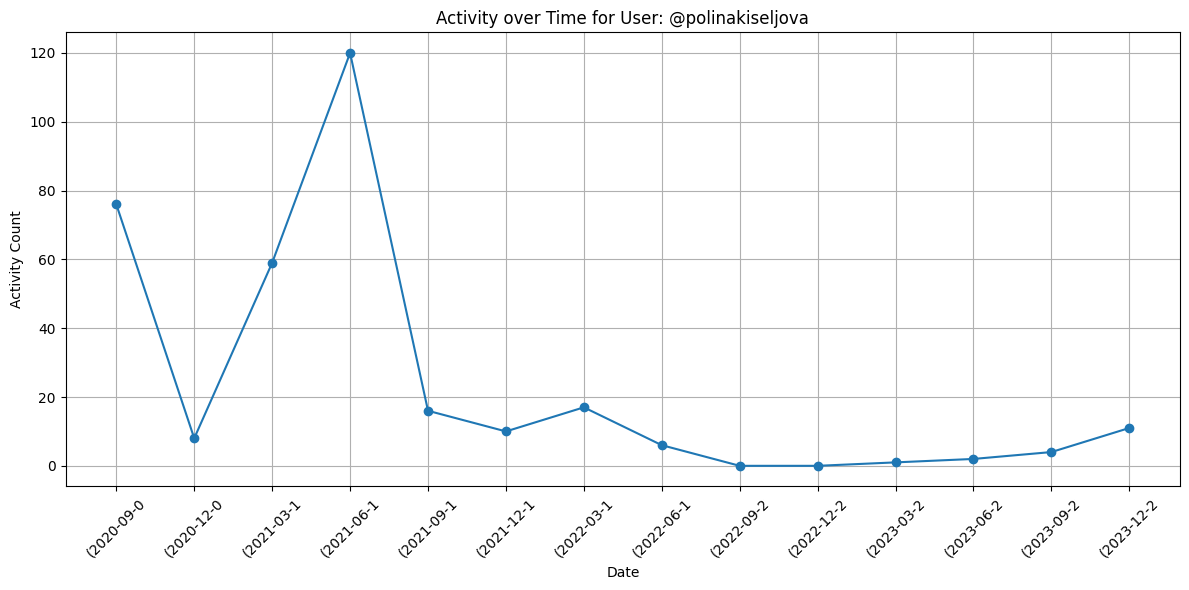

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

username_input = '@polinakiseljova'

user_id = df_users.loc[df_users['user_name'] == username_input, 'tg_id']

user_id = 236103213

user_activity = df[df['action_from'] == user_id]

if user_activity.empty:
    print(f'No activity found for user ID {user_id}.')
else:
    user_activity['time'] = pd.to_datetime(user_activity['time'])

    start_time = user_activity['time'].min()
    end_time = user_activity['time'].max()

    num_points = 15
    time_bins = pd.date_range(start=start_time, end=end_time, periods=num_points)

    user_activity['time_bin'] = pd.cut(user_activity['time'], bins=time_bins)
    activity_counts = user_activity.groupby('time_bin').size()

    plt.figure(figsize=(12, 6))
    plt.plot(activity_counts.index.astype(str).str[:10], activity_counts.values, marker='o')
    plt.title(f'Activity over Time for User: {username_input}')
    plt.xlabel('Date') 
    plt.ylabel('Activity Count')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()


Обработка чата: sailingmipt
Обработка чата: mipt_statmethods
Обработка чата: kotlin_mipt
Обработка чата: online_mipt
Обработка чата: online_mipt_ai
Обработка чата: chatmiptonlinedegree
Обработка чата: sys_prog
Обработка чата: uavprofru
Обработка чата: mipt_ai_pm
Обработка чата: hggg
Обработка чата: qsteducation
Обработка чата: miptkino
Обработка чата: cacscmawale
Обработка чата: qa_courses
Обработка чата: fakt_mipt
Обработка чата: abitu_sepmp
Обработка чата: a4mipt
Обработка чата: evidance_art
Обработка чата: ege100ballov_chat
Обработка чата: mipt_mmphys
Обработка чата: hsse_entering
236103213    331
272240371    204
447463387    143
846913327    124
88093502      56
294392354     51
234702561     51
495925142     46
335447341     33
279134583     30
47065332      22
101328239     20
139660708     18
252448409     18
348032257     17
Name: 236103213, dtype: int64


/var/folders/mt/wwjblmbj5hgchst8gt4q51zr0000gn/T/ipykernel_3774/1628213835.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_usernames, y=top_15_probabilities.values, palette='viridis')


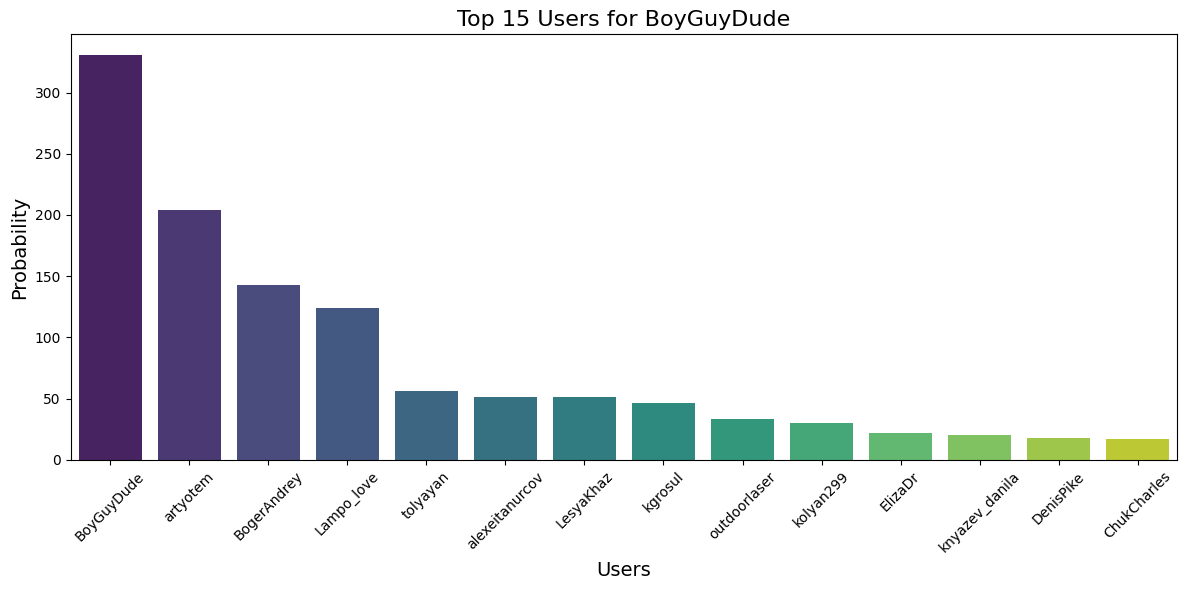

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['time'] = pd.to_datetime(df['time'])

time_window = pd.Timedelta('5 hours')
iteration_limit = 20
iteration_count = 0 

chat_id_to_name = {row['chat_id']: row['chat_name'] for index, row in df_groups[['chat_id', 'chat_name']].drop_duplicates().iterrows()}
user_id_to_username = {row['tg_id']: row['user_name'] for index, row in df_users[['tg_id', 'user_name']].drop_duplicates().iterrows()}
unique_users = df['action_from'].unique()

probabilities_matrix = pd.DataFrame(0, index=unique_users, columns=unique_users)

for chat in df['chat_id'].unique():
    print(f'Обработка чата: {chat_id_to_name.get(chat, chat)}')
    iteration_count += 1
    if iteration_count > iteration_limit:
        break

    chat_messages = df[df['chat_id'] == chat]
    for user in unique_users:
        user_messages = chat_messages[chat_messages['action_from'] == user]
        for message_time in user_messages['time']:
            replies_within_window = chat_messages[(chat_messages['time'] >= message_time) & 
                                                  (chat_messages['time'] <= message_time + time_window)]
            if not replies_within_window.empty:
                for responder in replies_within_window['action_from'].unique():
                    probabilities_matrix.loc[responder, user] += 1

row_sums = probabilities_matrix.sum(axis=1)
probabilities_matrix = probabilities_matrix.loc[(row_sums > 0), (probabilities_matrix.sum(axis=0) > 0)]

action_from = 236103213

user_probabilities = probabilities_matrix.loc[action_from]

top_15_probabilities = user_probabilities.nlargest(15)

top_15_usernames = [user_id_to_username.get(user, user) for user in top_15_probabilities.index]

print(top_15_probabilities)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_usernames, y=top_15_probabilities.values, palette='viridis')

plt.title(f'Top 15 Users for {user_id_to_username.get(action_from, action_from)}', fontsize=16)
plt.xlabel('Users', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()







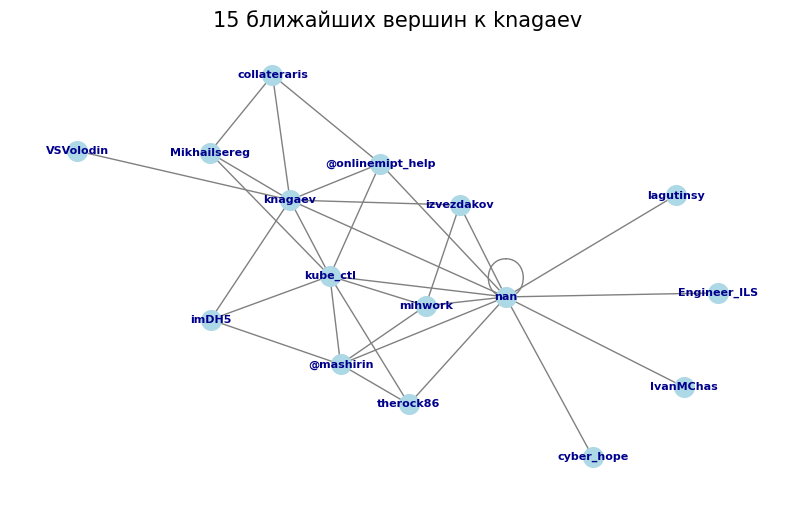

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

chat_id_to_name = {row['chat_id']: row['chat_name'] for index, row in df_groups[['chat_id', 'chat_name']].drop_duplicates().iterrows()}
user_id_to_username = {row['tg_id']: row['user_name'] for index, row in df_users[['tg_id', 'user_name']].drop_duplicates().iterrows()}

replies = df[df['action'] == 'reply']
messages = df[df['action'] == 'message']

result = []
for index, reply in replies.iterrows():
    reply_on_id = reply['reply_on_id']
    reply_on_chat_id = reply['reply_on_chat_id']
    
    matched_message = messages[
        (messages['message_id'] == reply_on_id) & 
        (messages['message_chat_id'] == reply_on_chat_id)
    ]
    
    if not matched_message.empty:
        action_from_reply = reply['action_from']
        action_from_message = matched_message['action_from'].values[0]
        
        pair = {
            'action_from_reply': action_from_reply,
            'action_from_message': action_from_message,
            'reply_on_id': reply_on_id,
            'reply_on_chat_id': reply_on_chat_id
        }
        result.append(pair)

new_df = pd.DataFrame(result)

G = nx.Graph()

for index, row in new_df.iterrows():
    reply_user = user_id_to_username.get(row['action_from_reply'], row['action_from_reply'])
    message_user = user_id_to_username.get(row['action_from_message'], row['action_from_message'])
    
    if reply_user != message_user:
        G.add_edge(reply_user, message_user)

specified_action_from = 390641069
specified_username = user_id_to_username.get(specified_action_from, specified_action_from)

distance_dict = nx.single_source_shortest_path_length(G, specified_username)

nearest_nodes = sorted(distance_dict.items(), key=lambda x: x[1])[1:16] 
nearest_nodes = [node[0] for node in nearest_nodes]

subgraph = G.subgraph(nearest_nodes + [specified_username]) 

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(subgraph)

nx.draw_networkx_edges(subgraph, pos, edge_color='gray')

nx.draw_networkx_nodes(subgraph, pos, node_size=200, node_color='lightblue')

nx.draw_networkx_labels(subgraph, pos, font_size=8, font_color='darkblue', font_weight='bold')

plt.title(f'15 ближайших вершин к {specified_username}', fontsize=15)
plt.axis('off')
plt.show()

